# A Ratio

1. month_lag and apply_month
2. pa_sum = sum(purchase_amount_new) group by month_lag
3. a ratio = pa_sum(t+1) / pa_sum(t)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.10f}'.format)

train = pd.read_csv('./data/train.csv')
historical_transactions = pd.read_csv('./data/historical_transactions.csv')
new_merchant_transactions = pd.read_csv('./data/new_merchant_transactions.csv')

In [3]:
def shift_round(col):
    # shift_round: reverse normalization ?
    # where are the two numbers come from ?
    return np.round(col / 0.00150265118 + 497.06, 2)

new_merchant_transactions['purchase_amount_new'] = shift_round(new_merchant_transactions['purchase_amount'])
historical_transactions['purchase_amount_new'] = shift_round(historical_transactions['purchase_amount'])
train['target_raw'] = 2**train['target']

# month_lag

In [4]:
historical_transactions.purchase_date.head().apply(lambda x: x[:7])

0    2017-06
1    2017-07
2    2017-08
3    2017-09
4    2017-03
Name: purchase_date, dtype: object

In [5]:
historical_transactions["purchase_month"] = historical_transactions.purchase_date.apply(lambda x: x[:7])

In [6]:
agg_by_month = historical_transactions.groupby(["month_lag", "purchase_month"]).size().reset_index().sort_values("month_lag")

In [7]:
agg_by_month.head(10)

,month_lag,purchase_month,0
0,-13,2017-01,689097
1,-12,2017-01,73787
2,-12,2017-02,718186
3,-11,2017-01,57232
4,-11,2017-02,78300
5,-11,2017-03,872346
6,-10,2017-01,44205
7,-10,2017-02,60989
8,-10,2017-03,95132
9,-10,2017-04,884727


In [8]:
agg_by_month.month_lag.value_counts()

 0     13
-1     13
-2     12
-3     11
-4     10
-5      9
-6      8
-7      7
-8      6
-9      5
-10     4
-11     3
-12     2
-13     1
Name: month_lag, dtype: int64

In [24]:
new_merchant_transactions["purchase_month"] = new_merchant_transactions.purchase_date.apply(lambda x: x[:7])
agg_by_month_new = new_merchant_transactions.groupby(["month_lag", "purchase_month"]).size().reset_index().sort_values("month_lag")

In [28]:
new_merchant_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,purchase_amount_new,purchase_month
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.5575737500,2018-03-11 14:57:36,1.0000000000,9,19,126.0000000000,2018-03
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.5695799300,2018-03-19 18:53:37,1.0000000000,9,19,118.0100000000,2018-03
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.5510372100,2018-04-26 14:08:44,1.0000000000,9,14,130.3500000000,2018-04
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.6719255000,2018-03-07 09:43:21,nan,-1,8,49.9000000000,2018-03
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.6599042900,2018-03-22 21:07:53,nan,-1,29,57.9000000000,2018-03


In [25]:
agg_by_month_new.head(10)

,month_lag,purchase_month,0
0,1,2017-03,1298
11,1,2018-02,67974
10,1,2018-01,52501
9,1,2017-12,41424
8,1,2017-11,24105
7,1,2017-10,21455
12,1,2018-03,734538
5,1,2017-08,15959
4,1,2017-07,16093
3,1,2017-06,12089


In [27]:
agg_by_month_new.month_lag.value_counts()

2    13
1    13
Name: month_lag, dtype: int64

# purchase_monthly (hist)

In [9]:
purchase_monthly = historical_transactions.groupby(["card_id", "month_lag"]).purchase_amount_new.sum().reset_index()
purchase_monthly["target_raw"] = purchase_monthly.card_id.map(train.set_index("card_id").target_raw)

In [10]:
purchase_monthly.head(20)

,card_id,month_lag,purchase_amount_new,target_raw
0,C_ID_00007093c1,-12,1100.2000000000,1.0973903390
1,C_ID_00007093c1,-11,1168.9000000000,1.0973903390
2,C_ID_00007093c1,-10,1633.2500000000,1.0973903390
3,C_ID_00007093c1,-9,2691.1300000000,1.0973903390
4,C_ID_00007093c1,-8,2876.6300000000,1.0973903390
5,C_ID_00007093c1,-7,1307.7900000000,1.0973903390
6,C_ID_00007093c1,-6,4189.0000000000,1.0973903390
7,C_ID_00007093c1,-5,524.5700000000,1.0973903390
8,C_ID_00007093c1,-4,1513.5900000000,1.0973903390
9,C_ID_00007093c1,-3,940.2500000000,1.0973903390


In [11]:
purchase_monthly.month_lag.value_counts().sort_index()

-13     66895
-12     81424
-11     96774
-10    109720
-9     124466
-8     141009
-7     162463
-6     185683
-5     211218
-4     237301
-3     266533
-2     293743
-1     293364
 0     293172
Name: month_lag, dtype: int64

# identities

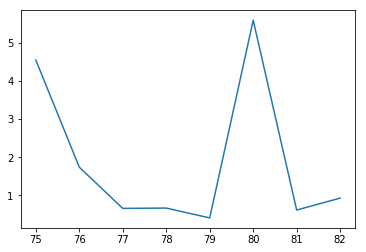

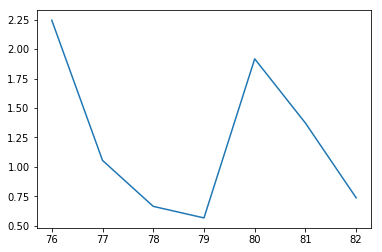

,card_id,month_lag,purchase_amount_new,target_raw,ratio1,sum2,ratio2,sum3,ratio3,sum4,ratio4
74,C_ID_00027503e2,-8,4.0000000000,1.7567049845,nan,nan,nan,nan,nan,nan,nan
75,C_ID_00027503e2,-7,18.1800000000,1.7567049845,4.5450000000,22.1800000000,nan,nan,nan,nan,nan
76,C_ID_00027503e2,-6,31.6200000000,1.7567049845,1.7392739274,49.8000000000,2.2452660054,53.8000000000,nan,nan,nan
77,C_ID_00027503e2,-5,20.8700000000,1.7567049845,0.6600253004,52.4900000000,1.0540160643,70.6700000000,1.3135687732,74.6700000000,nan
78,C_ID_00027503e2,-4,13.9500000000,1.7567049845,0.6684235745,34.8200000000,0.6633644504,66.4400000000,0.9401443328,84.6200000000,1.1332529798
79,C_ID_00027503e2,-3,5.7300000000,1.7567049845,0.4107526882,19.6800000000,0.5651924182,40.5500000000,0.6103251054,72.1700000000,0.8528716615
80,C_ID_00027503e2,-2,32.0000000000,1.7567049845,5.5846422339,37.7300000000,1.9171747967,51.6800000000,1.2744759556,72.5500000000,1.0052653457
81,C_ID_00027503e2,-1,19.7400000000,1.7567049845,0.6168750000,51.7400000000,1.3713225550,57.4700000000,1.1120356037,71.4200000000,0.9844245348
82,C_ID_00027503e2,0,18.3400000000,1.7567049845,0.9290780142,38.0800000000,0.7359876305,70.0800000000,1.2194188272,75.8100000000,1.0614673761


In [12]:
part = purchase_monthly[purchase_monthly.card_id == "C_ID_00027503e2"].copy()
part["ratio1"] = part.rolling(window=2).purchase_amount_new.apply(lambda x: x[1] / x[0], raw=True)
for i in range(3):
    window_size = i + 2
    sum_col = "sum{}".format(window_size)
    ratio_col = "ratio{}".format(window_size)
    part[sum_col] = part.rolling(window=window_size).purchase_amount_new.sum()
    part[ratio_col] = part.rolling(window=2)[sum_col].apply(lambda x: x[1] / x[0], raw=True)
 
part.ratio1.plot()
plt.show()
part.ratio2.plot()
plt.show()
part

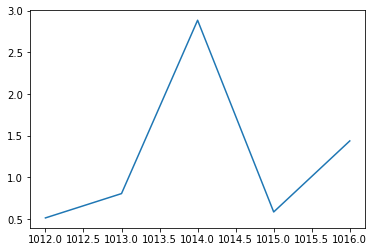

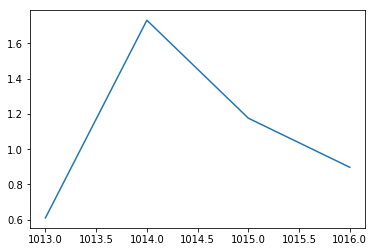

,card_id,month_lag,purchase_amount_new,target_raw,ratio1,sum2,ratio2,sum3,ratio3,sum4,ratio4
1011,C_ID_00192a74ce,-5,621.9600000000,2.4565286584,nan,nan,nan,nan,nan,nan,nan
1012,C_ID_00192a74ce,-4,318.3800000000,2.4565286584,0.5118978712,940.3400000000,nan,nan,nan,nan,nan
1013,C_ID_00192a74ce,-3,255.8900000000,2.4565286584,0.8037251084,574.2700000000,0.6107046387,1196.2300000000,nan,nan,nan
1014,C_ID_00192a74ce,-2,737.7800000000,2.4565286584,2.8831919966,993.6700000000,1.7303184913,1312.0500000000,1.0968208455,1934.0100000000,nan
1015,C_ID_00192a74ce,-1,430.4300000000,2.4565286584,0.5834123994,1168.2100000000,1.1756518764,1424.1000000000,1.0854007088,1742.4800000000,0.9009674200
1016,C_ID_00192a74ce,0,617.9500000000,2.4565286584,1.4356573659,1048.3800000000,0.8974242645,1786.1600000000,1.2542377642,2042.0500000000,1.1719216289


In [13]:
part = purchase_monthly[purchase_monthly.card_id == "C_ID_00192a74ce"].copy()
part["ratio1"] = part.rolling(window=2).purchase_amount_new.apply(lambda x: x[1] / x[0], raw=True)
for i in range(3):
    window_size = i + 2
    sum_col = "sum{}".format(window_size)
    ratio_col = "ratio{}".format(window_size)
    part[sum_col] = part.rolling(window=window_size).purchase_amount_new.sum()
    part[ratio_col] = part.rolling(window=2)[sum_col].apply(lambda x: x[1] / x[0], raw=True)
 
part.ratio1.plot()
plt.show()
part.ratio2.plot()
plt.show()
part

In [14]:
part = purchase_monthly[purchase_monthly.card_id == "C_ID_0001506ef0"].copy()
part["ratio1"] = part.rolling(window=2).purchase_amount_new.apply(lambda x: x[1] / x[0], raw=True)
for i in range(3):
    window_size = i + 2
    sum_col = "sum{}".format(window_size)
    ratio_col = "ratio{}".format(window_size)
    part[sum_col] = part.rolling(window=window_size).purchase_amount_new.sum()
    part[ratio_col] = part.rolling(window=2)[sum_col].apply(lambda x: x[1] / x[0], raw=True)
    
part

,card_id,month_lag,purchase_amount_new,target_raw,ratio1,sum2,ratio2,sum3,ratio3,sum4,ratio4
19,C_ID_0001506ef0,-13,51.0000000000,1.8458624369,nan,nan,nan,nan,nan,nan,nan
20,C_ID_0001506ef0,-12,184.4800000000,1.8458624369,3.6172549020,235.4800000000,nan,nan,nan,nan,nan
21,C_ID_0001506ef0,-11,286.5300000000,1.8458624369,1.5531764961,471.0100000000,2.0002123323,522.0100000000,nan,nan,nan
22,C_ID_0001506ef0,-9,30.0000000000,1.8458624369,0.1047010784,316.5300000000,0.6720239485,501.0100000000,0.9597708856,552.0100000000,nan
23,C_ID_0001506ef0,-8,24.8700000000,1.8458624369,0.8290000000,54.8700000000,0.1733484978,341.4000000000,0.6814235245,525.8800000000,0.9526639010
24,C_ID_0001506ef0,-7,1017.0000000000,1.8458624369,40.8926417370,1041.8700000000,18.9879715692,1071.8700000000,3.1396309315,1358.4000000000,2.5830988058
25,C_ID_0001506ef0,-6,849.5000000000,1.8458624369,0.8352999017,1866.5000000000,1.7914903011,1891.3700000000,1.7645516714,1921.3700000000,1.4144361013
26,C_ID_0001506ef0,-5,770.5000000000,1.8458624369,0.9070041201,1620.0000000000,0.8679346370,2637.0000000000,1.3942274647,2661.8700000000,1.3854020829
27,C_ID_0001506ef0,-4,910.7400000000,1.8458624369,1.1820116807,1681.2400000000,1.0378024691,2530.7400000000,0.9597042093,3547.7400000000,1.3327998738
28,C_ID_0001506ef0,-3,1089.2800000000,1.8458624369,1.1960383864,2000.0200000000,1.1896100497,2770.5200000000,1.0947469910,3620.0200000000,1.0203735336


In [15]:
past_only = purchase_monthly[(~purchase_monthly.card_id.isin(new_merchant_transactions.card_id.unique())) & purchase_monthly.target_raw.notnull()]

In [16]:
past_only.card_id.unique()[:10]

array(['C_ID_00027503e2', 'C_ID_0005b2f279', 'C_ID_0005b5804f',
       'C_ID_000b13135b', 'C_ID_000c778b05', 'C_ID_000cadb0f6',
       'C_ID_000fc266be', 'C_ID_0015cb7ed9', 'C_ID_00167ca6d8',
       'C_ID_00192a74ce'], dtype=object)

# window=1

In [17]:
def psum_at_lag(data, lag):
    return data[data.month_lag == lag].set_index("card_id").purchase_amount_new

compare_df = pd.DataFrame()
compare_df["ratio0"] = psum_at_lag(purchase_monthly, 0) / psum_at_lag(purchase_monthly, -1)
compare_df["ratio1"] = psum_at_lag(purchase_monthly, -1) / psum_at_lag(purchase_monthly, -2)
compare_df["target_raw"] = compare_df.index.map(train.set_index("card_id").target_raw)

In [18]:
part = compare_df[compare_df.target_raw.notnull()]
part = part[(part.ratio0 < 20) & (part.target_raw < 20) & (part.ratio1 < 20)]

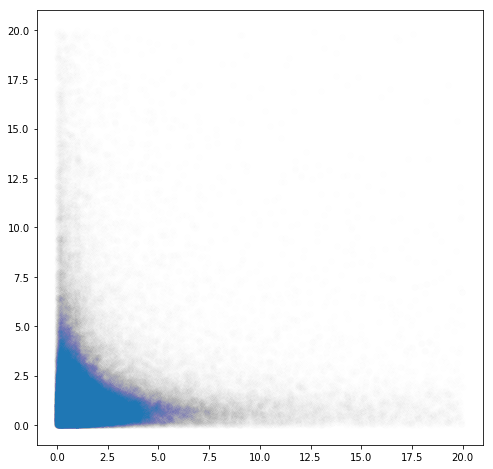

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(part.ratio0, part.target_raw, alpha=.002)

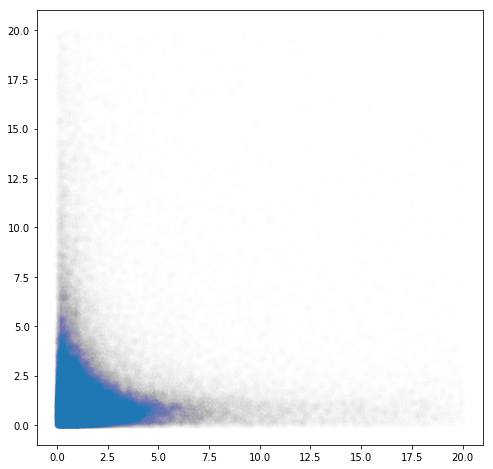

In [20]:
plt.figure(figsize=(8, 8))
plt.scatter(part.ratio1, part.target_raw, alpha=.002)

# window=1 (no new merchat)

In [21]:
part = part[~part.index.isin(new_merchant_transactions.card_id.unique())]

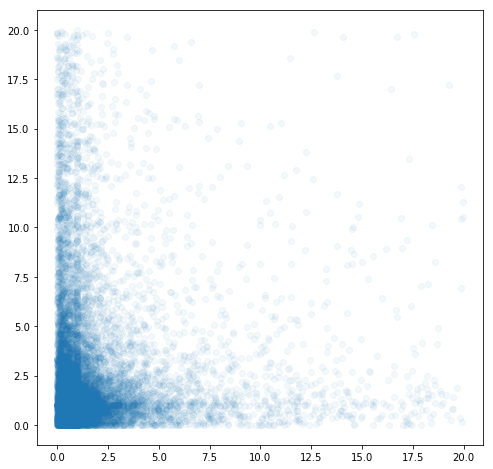

In [22]:
plt.figure(figsize=(8, 8))
plt.scatter(part.ratio0, part.target_raw, alpha=.05)

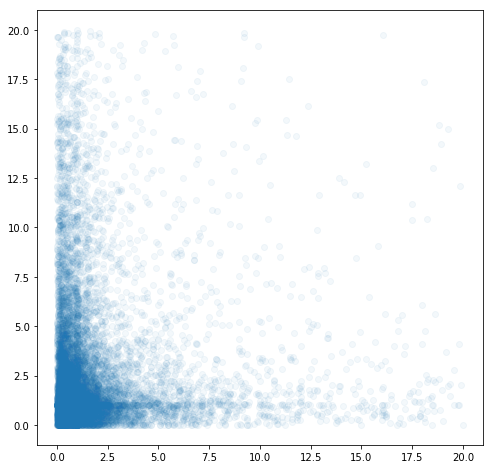

In [23]:
plt.figure(figsize=(8, 8))
plt.scatter(part.ratio1, part.target_raw, alpha=.05)

# purchase_monthly (all)

In [35]:
all_transactions = pd.concat([historical_transactions, new_merchant_transactions], axis=0)

In [36]:
all_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,purchase_amount_new,purchase_month
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.7033309100,2017-06-25 15:33:07,1.0000000000,16,37,29.0000000000,2017-06
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.7331284800,2017-07-15 12:10:45,1.0000000000,16,16,9.1700000000,2017-07
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.7203860000,2017-08-09 22:04:29,1.0000000000,16,37,17.6500000000,2017-08
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.7353524100,2017-09-02 10:06:26,1.0000000000,16,34,7.6900000000,2017-09
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.7228653800,2017-03-10 01:14:19,1.0000000000,16,37,16.0000000000,2017-03


In [37]:
purchase_monthly_all = all_transactions.groupby(["card_id", "month_lag"]).purchase_amount_new.sum().reset_index()
purchase_monthly_all["target_raw"] = purchase_monthly_all.card_id.map(train.set_index("card_id").target_raw)

In [38]:
purchase_monthly_all.month_lag.value_counts().sort_index()

-13     66895
-12     81424
-11     96774
-10    109720
-9     124466
-8     141009
-7     162463
-6     185683
-5     211218
-4     237301
-3     266533
-2     293743
-1     293364
 0     293172
 1     243856
 2     236507
Name: month_lag, dtype: int64

In [41]:
purchase_monthly_all[purchase_monthly_all.target_raw.notnull()].card_id.unique()[:10]

array(['C_ID_00007093c1', 'C_ID_0001506ef0', 'C_ID_000183fdda',
       'C_ID_00027503e2', 'C_ID_0002c7c2c1', 'C_ID_0003be3c83',
       'C_ID_00042d509c', 'C_ID_0004888ddd', 'C_ID_0004b68c49',
       'C_ID_0004c2a5ab'], dtype=object)

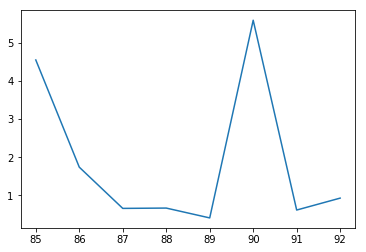

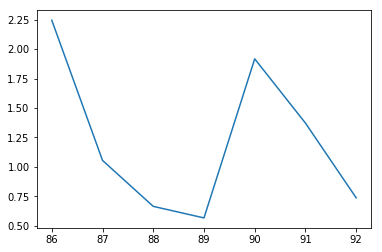

,card_id,month_lag,purchase_amount_new,target_raw,ratio1,sum2,ratio2,sum3,ratio3,sum4,ratio4
84,C_ID_00027503e2,-8,4.0000000000,1.7567049845,nan,nan,nan,nan,nan,nan,nan
85,C_ID_00027503e2,-7,18.1800000000,1.7567049845,4.5450000000,22.1800000000,nan,nan,nan,nan,nan
86,C_ID_00027503e2,-6,31.6200000000,1.7567049845,1.7392739274,49.8000000000,2.2452660054,53.8000000000,nan,nan,nan
87,C_ID_00027503e2,-5,20.8700000000,1.7567049845,0.6600253004,52.4900000000,1.0540160643,70.6700000000,1.3135687732,74.6700000000,nan
88,C_ID_00027503e2,-4,13.9500000000,1.7567049845,0.6684235745,34.8200000000,0.6633644504,66.4400000000,0.9401443328,84.6200000000,1.1332529798
89,C_ID_00027503e2,-3,5.7300000000,1.7567049845,0.4107526882,19.6800000000,0.5651924182,40.5500000000,0.6103251054,72.1700000000,0.8528716615
90,C_ID_00027503e2,-2,32.0000000000,1.7567049845,5.5846422339,37.7300000000,1.9171747967,51.6800000000,1.2744759556,72.5500000000,1.0052653457
91,C_ID_00027503e2,-1,19.7400000000,1.7567049845,0.6168750000,51.7400000000,1.3713225550,57.4700000000,1.1120356037,71.4200000000,0.9844245348
92,C_ID_00027503e2,0,18.3400000000,1.7567049845,0.9290780142,38.0800000000,0.7359876305,70.0800000000,1.2194188272,75.8100000000,1.0614673761


In [44]:
part = purchase_monthly_all[purchase_monthly_all.card_id == "C_ID_00027503e2"].copy()
part["ratio1"] = part.rolling(window=2).purchase_amount_new.apply(lambda x: x[1] / x[0], raw=True)
for i in range(3):
    window_size = i + 2
    sum_col = "sum{}".format(window_size)
    ratio_col = "ratio{}".format(window_size)
    part[sum_col] = part.rolling(window=window_size).purchase_amount_new.sum()
    part[ratio_col] = part.rolling(window=2)[sum_col].apply(lambda x: x[1] / x[0], raw=True)
 
part.ratio1.plot()
plt.show()
part.ratio2.plot()
plt.show()
part